**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [23]:
# Write your code here
import numpy as np
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [24]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

Answering this question required using the above mentioned three market clearing conditions:


1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
2. Good market 1: $c_1^* = y_1^*$
3. Good market 2: $c_2^* = y_2^*$

We want to check if pairs of p1 and p2, from range `linspace(0.1,2.0,10)`, clear the markets, i.e. if the price vector leads to the equality of conditions 1, 2 and 3. Note that `linspace(0.1,2.0,10)` means that the prices are in a range of 10 evenly spaced values starting from 0.1 to 2.0, inclusive.


Breaking down the steps of the code below: 

**Step 0**: We first defined the price range and the wage (as the numeraire) as requested by the question. 

**Step 1**: For each firm, we have defined, as displayed above:
 - The optimal labour demand: $\ell_1^*$ and $\ell_2^*$
 - The optimal output: $y_1^*$ and $y_2^*$
 - The optimal profits: $\pi_1^*$ and $\pi_2^*$

**Step 2**: For each good we have defined the optimal consumption level, for a given $\ell$: $c_{1}(\ell)$ and $c_{2}(\ell)$.

**Step 3**: Solving the maximization problem for the optimal labour supply:
- Defining the objective funtion: $\log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon}$ 
- Solving the maximization problem finding $\ell^*$, using a numerical optimizer, more precisely: optimize.minimize_scalar .
- Note that we use a minimizer, but we want to maximize, so we return the negative of the objective function.

**Step 4**: Defining the three market clearing conditions, for the required price range and wage as numeraire. 
- To check **for each given pair of prices** if the three market conditions clear, we have used **Generative AI**, in this case ChatGPT, to provide us with a way to assess if the conditions clear. ChatGPT suggested to use np.isclose, which allows to check if the variables are close to each other (approximatelly equal), and hence if the each market clears or not. We have used a tolerance level of 1e-3.

In [25]:
# IMPORTS:
from scipy import optimize

# 0. DEFINING THE PRICE RANGE AND WAGE RATE AS REQUESTED:
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)
w = 1  

# 1. FIRMS OPTIMAL BEHAVIOUR

# 1.1. Optimal Behaviour Firm 1:
    # 1.1.1. Optimal Labour Demand Firm 1:
def l_1_star(w, p1, A, gamma):
    return (p1 * A * gamma / w) ** (1 / (1 - gamma))
    # 1.1.2. Optimal Output Firm 1:
def y_1_star(w, p1, A, gamma):
    return A * (l_1_star(w, p1, A, gamma)) ** gamma
    # 1.1.3. Optimal Profit Firm 1:
def pi_1_star(w, p1, A, gamma):
    return (1 - gamma) / gamma * w * (p1 * A * gamma / w) ** (1 / (1 - gamma))

# 1.2. Optimal Behaviour Firm 2:
    # 1.2.1. Optimal Labour Demand Firm 2:
def l_2_star(w, p2, A, gamma):
    return (p2 * A * gamma / w) ** (1 / (1 - gamma))
    # 1.2.2. Optimal Output Firm 2:
def y_2_star(w, p2, A, gamma):
    return A * (l_2_star(w, p2, A, gamma)) ** gamma
    # 1.2.3. Optimal Profit Firm 2:
def pi_2_star(w, p2, A, gamma):
    return (1 - gamma) / gamma * w * (p2 * A * gamma / w) ** (1 / (1 - gamma))

# 2. CONSUMERS OPTIMAL BEHAVIOUR, FOR A GIVEN LABOUR INPUT: 

# 2.1. Optimal consumption of good 1, for a given l:
def c1_star_given_l(w, p1, T, pi_1_star, pi_2_star, alpha, l):
    return alpha * (w * l + T + pi_1_star + pi_2_star) / p1

# 2.2. Optimal consumption of good 2, for a given l:
def c2_star_given_l(w, p2, T, pi_1_star, pi_2_star, alpha, tau, l):
    return (1 - alpha) * (w * l + T + pi_1_star + pi_2_star) / (p2 + tau)


# 3. SOLVING OPTIMAL LABOUR SUPPLY:

# 3.1. Define objective function: 
def optimal_labour_supply_function(l, w, p1, p2, A, gamma, alpha, nu, epsilon, T, tau):
    pi_1 = pi_1_star(w, p1, A, gamma)
    pi_2 = pi_2_star(w, p2, A, gamma)
    c1 = c1_star_given_l(w, p1, T, pi_1, pi_2, alpha, l)
    c2 = c2_star_given_l(w, p2, T, pi_1, pi_2, alpha, tau, l)
    utility = np.log((c1 ** alpha) * (c2 ** (1 - alpha))) - nu * (l ** (1 + epsilon)) / (1 + epsilon)
    return -utility # We use a minimizer, so we want to return the negative of the function

# 3.2. Using the minimizer to find optimal labour:
def find_optimal_labour_supply(w, p1, p2, A, gamma, alpha, nu, epsilon, T, tau):
    result = optimize.minimize_scalar(optimal_labour_supply_function, bounds=(0, 10), args=(w, p1, p2, A, gamma, alpha, nu, epsilon, T, tau), method='bounded')
    return result.x

# 4. CHECK MARKET CLEARING CONDITIONS

# 4.1. Define the three different market clearing conditions, for the price ranges defined:
def market_clearing(w, p1_range, p2_range, A, gamma, alpha, nu, epsilon, T, tau):
    for p1 in p1_range:
        for p2 in p2_range:
            sum_l = l_1_star(w, p1, A, gamma) + l_2_star(w, p2, A, gamma)
            l_star = find_optimal_labour_supply(w, p1, p2, A, gamma, alpha, nu, epsilon, T, tau)
            c1_star = c1_star_given_l(w, p1, T, pi_1_star(w, p1, A, gamma), pi_2_star(w, p2, A, gamma), alpha, l_star)
            c2_star = c2_star_given_l(w, p2, T, pi_1_star(w, p1, A, gamma), pi_2_star(w, p2, A, gamma), alpha, tau, l_star)
            y1_star = y_1_star(w, p1, A, gamma)
            y2_star = y_2_star(w, p2, A, gamma)
            
            # 4.1.1. Check market clearing conditions
            market_clearing_good_1 = np.isclose(c1_star, y1_star, atol=1e-3) # market_clearing_good_1 checks if the consumption of good 1 (c1_star) is close to its production (y1_star).
            market_clearing_good_2 = np.isclose(c2_star, y2_star, atol=1e-3) # market_clearing_good_2 checks if the consumption of good 2 (c2_star) is close to its production (y2_star).
            market_clearing_labour = np.isclose(sum_l, l_star, atol=1e-3) # market_clearing_labour checks if the sum of the firms optimal labour demand (l_1_star + l_2_star) is close to the optimal supply of labour (l_star).
            print(f"For p1 = {p1} and p2 = {p2}:")
            print(f"Market clearing for good 1: {'Yes' if market_clearing_good_1 else 'No'}")
            print(f"Market clearing for good 2: {'Yes' if market_clearing_good_2 else 'No'}")
            print(f"Market clearing for labour: {'Yes' if market_clearing_labour else 'No'}")

# 4.2. Execute the market clearing check
market_clearing(w, p1_range, p2_range, par.A, par.gamma, par.alpha, par.nu, par.epsilon, par.T, par.tau)


For p1 = 0.1 and p2 = 0.1:
Market clearing for good 1: No
Market clearing for good 2: No
Market clearing for labour: No
For p1 = 0.1 and p2 = 0.3111111111111111:
Market clearing for good 1: No
Market clearing for good 2: No
Market clearing for labour: No
For p1 = 0.1 and p2 = 0.5222222222222223:
Market clearing for good 1: No
Market clearing for good 2: No
Market clearing for labour: No
For p1 = 0.1 and p2 = 0.7333333333333333:
Market clearing for good 1: No
Market clearing for good 2: No
Market clearing for labour: No
For p1 = 0.1 and p2 = 0.9444444444444444:
Market clearing for good 1: No
Market clearing for good 2: No
Market clearing for labour: No
For p1 = 0.1 and p2 = 1.1555555555555557:
Market clearing for good 1: No
Market clearing for good 2: No
Market clearing for labour: No
For p1 = 0.1 and p2 = 1.3666666666666667:
Market clearing for good 1: No
Market clearing for good 2: Yes
Market clearing for labour: No
For p1 = 0.1 and p2 = 1.577777777777778:
Market clearing for good 1: 

Note that, given that there are limited values that p1 and p2 can take, there is no scenario, for a pair of prices, in which the three market clear! In question 2 we discover what is the price vector that makes the markets clear.

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

As suggested by the hint in this question, to obtain the equilibrium prices, two out of the three markets have to clear, according with the Walras' Law. 

Given that, we have **focused on the markets for good 1 and good 2** ("ignoring" the labour market). Hence to find the equilibrium prices, we focused on the conditions below to hold in equality: 

2. Good market 1: $c_1^* = y_1^*$
3. Good market 2: $c_2^* = y_2^*$

Note that, consumption reflects the DEMAND for each good, and output reflects the SUPPLY of each good. Hence, these two conditions reflect that, for each good, demand must equal supply, in equilibrium. This means that the excess demand should be zero.

Breaking down the steps of the code below: 

**Step 1**: Excess demand functions:

- Excess demand good 1: $c_1^* - y_1^*$
- Excess demand good 2: $c_2^* - y_2^*$

**Step 2**: Iterative method to find the equilibrium prices- using a loop: 

- Similarly to the method used in Problem Set 2 of the course exercise classes, to find the equilibrium prices we use an **iterative method**. We use the same factor, tolerance and maximum iterations as used in the solutions to that exercise: k=0.5, eps=1e-8, maxiter=500.

- The loop checks if the absolute values of excess demand (Z1 and Z2) are below a small tolerance (eps) or if the maximum number of iterations (maxiter) is reached.

- If the loop continues, the prices p1 and p2 are updated using the excess demands and factor (k), which controls the step size of the price updates.

**Step 3**: Finds the equilibrium prices under iteration, that is the price vector that makes Z1 and Z2 below the tolerance (or that exceeds the maximum number of iterations, which is not the case for our result).

*NOTE: Instead of iteration, another potential method that can be used is optimization: finding the price vector that minimizes the excess demands. We present also that alternative, in which both yield the same approximation of price results! Note that, in this case, we use squared demands in the objective function to ensure a smooth, differentiable, and convex optimization, which helps the algorithm to find the equilibrium prices where excess demand is minimized.* 

In [26]:
# 1. EXCESS DEMAND FUCNTIONS:

    # 1.1. Excess demand for good 1:
def excess_demand_good1(p1, p2, w, A, gamma, alpha, nu, epsilon, T, tau):
    l_star = find_optimal_labour_supply(w, p1, p2, A, gamma, alpha, nu, epsilon, T, tau)
    c1_star = c1_star_given_l(w, p1, T, pi_1_star(w, p1, A, gamma), pi_2_star(w, p2, A, gamma), alpha, l_star)
    y1_star = y_1_star(w, p1, A, gamma)
    return c1_star - y1_star
    # 1.2. Excess demand for good 2:
def excess_demand_good2(p1, p2, w, A, gamma, alpha, nu, epsilon, T, tau):
    l_star = find_optimal_labour_supply(w, p1, p2, A, gamma, alpha, nu, epsilon, T, tau)
    c2_star = c2_star_given_l(w, p2, T, pi_1_star(w, p1, A, gamma), pi_2_star(w, p2, A, gamma), alpha, tau, l_star)
    y2_star = y_2_star(w, p2, A, gamma)
    return c2_star - y2_star

# 2. ITERATIVE METHOD TO FIND THE EQUILIBRIUM PRICES 
def find_equilibrium_prices(p1_init, p2_init, w, A, gamma, alpha, nu, epsilon, T, tau, k=0.5, eps=1e-8, maxiter=500):
    p1 = p1_init
    p2 = p2_init
    t = 0
    while True:
        # 2.1. Calculate excess demands
        Z1 = excess_demand_good1(p1, p2, w, A, gamma, alpha, nu, epsilon, T, tau)
        Z2 = excess_demand_good2(p1, p2, w, A, gamma, alpha, nu, epsilon, T, tau)

        # 2.2. Check if the excess demand is within tolerance or max iterations reached
        if (np.abs(Z1) < eps and np.abs(Z2) < eps) or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f}, p2 = {p2:12.8f} -> excess demands -> Z1: {Z1:14.8f}, Z2: {Z2:14.8f}')
            break

        # 2.3. Update prices
        p1 = p1 + k * Z1
        p2 = p2 + k * Z2

        # 2.4. Print intermediate results
        if t < 5 or t % 25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f}, p2 = {p2:12.8f} -> excess demands -> Z1: {Z1:14.8f}, Z2: {Z2:14.8f}')
        elif t == 5:
            print('   ...')

        t += 1

    return p1, p2

# 2.5. Defining initial prices (initial guess)
p1_init = 1.0
p2_init = 1.0

# 3. FINDING EQUILIBRIUM PRICES USING ITERATION
p1_equilibrium, p2_equilibrium = find_equilibrium_prices(p1_init, p2_init, w, par.A, par.gamma, par.alpha, par.nu, par.epsilon, par.T, par.tau)

print(f"Equilibrium prices are p1 = {p1_equilibrium}, p2 = {p2_equilibrium}")

  0: p1 =   0.95371401, p2 =   1.22533268 -> excess demands -> Z1:    -0.09257199, Z2:     0.45066537
  1: p1 =   0.94129123, p2 =   1.32944961 -> excess demands -> Z1:    -0.02484556, Z2:     0.20823386
  2: p1 =   0.94248366, p2 =   1.38782737 -> excess demands -> Z1:     0.00238487, Z2:     0.11675551
  3: p1 =   0.94811025, p2 =   1.42314737 -> excess demands -> Z1:     0.01125317, Z2:     0.07064001
  4: p1 =   0.95433519, p2 =   1.44549222 -> excess demands -> Z1:     0.01244989, Z2:     0.04468969
   ...
 25: p1 =   0.97591619, p2 =   1.49073660 -> excess demands -> Z1:     0.00001272, Z2:     0.00001945
 47: p1 =   0.97593103, p2 =   1.49075928 -> excess demands -> Z1:     0.00000000, Z2:     0.00000001
Equilibrium prices are p1 = 0.9759310317370544, p2 = 1.4907592753304648


In [27]:
# ALTERNATIVE TO ITERATION: OPTIMIZATION

# IMPORTS:
from scipy.optimize import minimize

# 1. EXCESS DEMAND FUCNTIONS:
    # 1.1. Excess demand for good 1:
def excess_demand_good_1(p, w, A, gamma, alpha, nu, epsilon, T, tau):
    p1, p2 = p
    l_star = find_optimal_labour_supply(w, p1, p2, A, gamma, alpha, nu, epsilon, T, tau)
    c1_star = c1_star_given_l(w, p1, T, pi_1_star(w, p1, A, gamma), pi_2_star(w, p2, A, gamma), alpha, l_star)
    y1_star = y_1_star(w, p1, A, gamma)
    return c1_star - y1_star

    # 1.2. Excess demand for good 2:
def excess_demand_good_2(p, w, A, gamma, alpha, nu, epsilon, T, tau):
    p1, p2 = p
    l_star = find_optimal_labour_supply(w, p1, p2, A, gamma, alpha, nu, epsilon, T, tau)
    c2_star = c2_star_given_l(w, p2, T, pi_1_star(w, p1, A, gamma), pi_2_star(w, p2, A, gamma), alpha, tau, l_star)
    y2_star = y_2_star(w, p2, A, gamma)
    return c2_star - y2_star

# 2. OBJECTIVE FUNCTION
def objective_function(p, w, A, gamma, alpha, nu, epsilon, T, tau):
    excess_demand1 = excess_demand_good_1(p, w, A, gamma, alpha, nu, epsilon, T, tau)
    excess_demand2 = excess_demand_good_2(p, w, A, gamma, alpha, nu, epsilon, T, tau)
    return excess_demand1**2 + excess_demand2**2 # Squared demands! 

# 2.1. Defining initial prices (initial guess)
initial_guess = [1.0, 1.0]

# 3. FINDING EQUILIBRIUM PRICES USING OPTIMIZATION
result = minimize(objective_function, initial_guess, args=(w, par.A, par.gamma, par.alpha, par.nu, par.epsilon, par.T, par.tau), bounds=[(0, None), (0, None)])

p1_equilibrium, p2_equilibrium = result.x

print(f"Equilibrium prices are p1 = {p1_equilibrium}, p2 = {p2_equilibrium}")


Equilibrium prices are p1 = 0.9759320595094495, p2 = 1.490763590373306


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

To answer this question, we started by defining the Government/ Social Planner problem. 

From above we have that "the government chooses $\tau$ and balances its budget so $T=\tau c_2^*$", hence  $T=\tau c_2^*$ is the government budget constraint.


The SWF uses U, and U is defined as:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

hence, we can define:
$$
\begin{align*}
U = \log((c_{1}^*)^{\alpha}(c_{2}^*)^{1-\alpha})-\nu\frac{(\ell^*)^{1+\epsilon}}{1+\epsilon}
\end{align*}
$$

so, the social planner problem is given by:
$$
\begin{align*}
\max_{\tau} SWF = U - \kappa y_2^* = \log((c_{1}^*)^{\alpha}(c_{2}^*)^{1-\alpha})-\nu\frac{(\ell^*)^{1+\epsilon}}{1+\epsilon} - \kappa y_2^* \\
\text{s.t.}\,\,\,&T=\tau c_2^*
\end{align*}
$$


***Important Note**: We first tried to set up this problem as an optimization problem (using minimize from scipy.optimize) with an equality constraint (the government budget) - i.e. constrained optimization. However, we constantly encountered bugging problems. To solve for that, we have then set up the problem differently, as seen below, in which we directly imposed the budget constraint within the Social Welfare Function. The final result does not seem correct according with economic intuition, which we are aware. However, we prefered submitting this solution as no running errors were encountered.* 

Breaking down the steps of the code below: 

**Step1**: Defines the Utility Function: U
- With an intial guess for T. 

**Step 2**: Defines the Social Welfare Function:

- The SWF will take not only the tax, but also the prices to be optimized, since in the previous calculations the equilibrium prices we have obtained in Question 2 were for when the tax and transfers were set to zero. 

- Note that it returns the negative social welfare, since we use a minimizer but we want to maximize.

**Step 3**: Sets the initial guess and bounds for the parameters to be optimized: tau, p1, and p2. 


**Step 4**: Performs the optimization, using minimize from scipy.optimize, getting the optimal values for tau, p1, and p2.


In [28]:
# 1. Defining the Utility Function:
def Utility_Function(p1, p2, w, A, gamma, alpha, nu, epsilon, tau):
    T = tau * 1  # Initial guess for T
    l_star = find_optimal_labour_supply(w, p1, p2, A, gamma, alpha, nu, epsilon, T, tau)
    c1_star = c1_star_given_l(w, p1, T, pi_1_star(w, p1, A, gamma), pi_2_star(w, p2, A, gamma), alpha, l_star)
    c2_star = c2_star_given_l(w, p2, T, pi_1_star(w, p1, A, gamma), pi_2_star(w, p2, A, gamma), alpha, tau, l_star)
    U = np.log((c1_star ** alpha) * (c2_star ** (1 - alpha))) - nu * (l_star ** (1 + epsilon)) / (1 + epsilon)
    return U, c2_star

#2.  Defining the Social Welfare Function:
def social_welfare_function(vector_price_tax, w, A, gamma, alpha, nu, epsilon, kappa):
    tau, p1, p2 = vector_price_tax
    U, c2_star = Utility_Function(p1, p2, w, A, gamma, alpha, nu, epsilon, tau)
    T = tau * c2_star # Imposing the budget constraint directly
    y2_star = y_2_star(w, p2, A, gamma)
    SWF = U - kappa * y2_star
    return -SWF  # Minimizing the negative of the SWF, to maximize SWF

# 3. Setting initial guess and bounds for tau and prices
# 3.1. Initial guess for [tau, p1, p2]
initial_guess = [0.5, 1.0, 1.0] 
# 3.2. Bounds for [tau, p1, p2]
bounds = [(0, 10), (0.1, 10), (0.1, 10)] 

# 4. Performing the optimization
result = minimize(social_welfare_function, initial_guess, args=(w, par.A, par.gamma, par.alpha, par.nu, par.epsilon, par.kappa), bounds=bounds, method='L-BFGS-B')

# 4.1. Extracting the optimal values of tau and prices
optimal_tau = result.x[0]
optimal_p1 = result.x[1]
optimal_p2 = result.x[2]

# 4.2. Calculating the corresponding optimal T
_, optimal_c2_star = Utility_Function(optimal_p1, optimal_p2, w, par.A, par.gamma, par.alpha, par.nu, par.epsilon, optimal_tau)
optimal_T = optimal_tau * optimal_c2_star

# 5. Print optimal solutions
print("Optimal tau:", optimal_tau)
print("Optimal T:", optimal_T)
print("Optimal p1:", optimal_p1)
print("Optimal p2:", optimal_p2)

Optimal tau: 0.0
Optimal T: 0.0
Optimal p1: 0.10000000000000002
Optimal p2: 0.1


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [29]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [30]:
# write your answer here

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [31]:
# Write your answer here 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [32]:
# write your answer here

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [33]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

*Question Interpretation*
We interpret the this question as: There is a random distribution of points in the vecotor X, and we try to find the coordinate of y. There are 4 other points; A, B, C, D; located at (a_1, a_2), (b_1, b_2), (c_1, c_2) and (d_1, d_2), the the closest points of X to y. Given these points, we want to see if y is within the triangle ABC, or CDA using bayescentric interpolation.

In [34]:
from Problem3 import Barycentric

# Create an instance of the Barycentric class
bary = Barycentric()

# Find the closest points
A, B, C, D = bary.find_closest_points()
print(f"y: {bary.y}")
print(f"A: {A}, B: {B}, C: {C}, D: {D}")

y: [0.20901926 0.37774759]
A: [0.26071605 0.43635845], B: [0.21315735 0.274245  ], C: [0.10056103 0.27951775], D: [0.20634391 0.44272557]


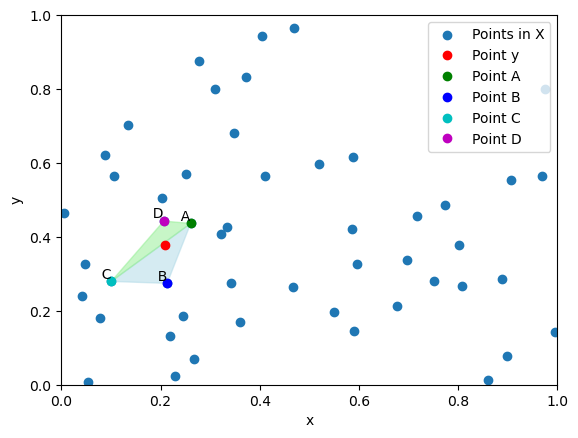

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Find the points
A, B, C, D = bary.find_closest_points()
y = bary.y

# Plot the points and triangles
fig, ax = plt.subplots()

# Plot points
ax.scatter(X[:, 0], X[:, 1], label='Points in X')
ax.plot(y[0], y[1], 'ro', label='Point y')

# Plot points A, B, C, D only if they are not None
if A is not None:
    ax.plot(A[0], A[1], 'go', label='Point A')
    ax.text(A[0], A[1], '  A', verticalalignment='bottom', horizontalalignment='right')
if B is not None:
    ax.plot(B[0], B[1], 'bo', label='Point B')
    ax.text(B[0], B[1], '  B', verticalalignment='bottom', horizontalalignment='right')
if C is not None:
    ax.plot(C[0], C[1], 'co', label='Point C')
    ax.text(C[0], C[1], '  C', verticalalignment='bottom', horizontalalignment='right')
if D is not None:
    ax.plot(D[0], D[1], 'mo', label='Point D')
    ax.text(D[0], D[1], '  D', verticalalignment='bottom', horizontalalignment='right')

# Plot triangles ABC and CDA
if A is not None and B is not None and C is not None:
    triangle_ABC = Polygon([A, B, C], closed=True, color='lightblue', alpha=0.5)
    ax.add_patch(triangle_ABC)
if C is not None and D is not None and A is not None:
    triangle_CDA = Polygon([C, D, A], closed=True, color='lightgreen', alpha=0.5)
    ax.add_patch(triangle_CDA)

# Set the axis limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Add a legend
ax.legend()

# Show the plot
plt.show()


Visually, it appears y is situated within the ABC triangle.

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

To solve this question, we start by computing all r values for both the ABC and CDA traingles. If all values of r are stritly positive, it is within that triangle. 

In [36]:
## TRIANGLE ABC
# Compute r1_ABC using the formula
num_ABC_1 = (B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])
den_ABC_1 = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])

r1_ABC = num_ABC_1 / den_ABC_1

# Compute r2_ABC using the formula
num_ABC_2 = (C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])
den_ABC_2 = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])

r2_ABC = num_ABC_2 / den_ABC_2

# Compute r3_ABC using the formula
r3_ABC = 1 - r1_ABC - r2_ABC

print("r1_ABC: {}, r2_ABC: {}, r3_ABC: {}".format(r1_ABC, r2_ABC, r3_ABC))

# TRIANGLE CDA
# Compute r1_CDA using the formula
num_CDA_1 = (D[1] - C[1]) * (y[0] - C[0]) + (C[0] - D[0]) * (y[1] - C[1])
den_CDA_1 = (D[1] - C[1]) * (A[0] - C[0]) + (C[0] - D[0]) * (A[1] - C[1])

r1_CDA = num_CDA_1 / den_CDA_1

# Compute r2_CDA using the formula
num_CDA_2 = (A[1] - D[1]) * (y[0] - C[0]) + (D[0] - A[0]) * (y[1] - C[1])
den_CDA_2 = (D[1] - C[1]) * (A[0] - C[0]) + (C[0] - D[0]) * (A[1] - C[1])

r2_CDA = num_CDA_2 / den_CDA_2

# Compute r3_CDA using the formula
r3_CDA = 1 - r1_CDA - r2_CDA

print("r1_CDA: {}, r2_CDA: {}, r3_CDA: {}".format(r1_CDA, r2_CDA, r3_CDA))

r1_ABC: 0.6286263152916166, r2_ABC: 0.06910145494351515, r3_ABC: 0.3022722297648682
r1_CDA: 0.7656667431230542, r2_CDA: -0.6317401242897134, r3_CDA: 0.8660733811666592


In [37]:
# Determine if the point is within the triangle ABC or CDA
if r1_ABC > 0 and r2_ABC > 0 and r3_ABC > 0:
    print("The barycentric coordinates are within the triangle ABC, r1_ABC={}, r2_ABC={}, r3_ABC={}".format(r1_ABC, r2_ABC, r3_ABC))
elif r1_CDA > 0 and r2_CDA > 0 and r3_CDA > 0:
    print("The barycentric coordinates are within the triangle CDA, r1_CDA={}, r2_CDA={}, r3_CDA={}".format(r1_CDA, r2_CDA, r3_CDA))
else:
    print("The barycentric coordinates are not within any triangle")

The barycentric coordinates are within the triangle ABC, r1_ABC=0.6286263152916166, r2_ABC=0.06910145494351515, r3_ABC=0.3022722297648682


Comparing the results of Q1 and Q2, it seems to be correct.

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [38]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

My interpretation is that this means, for a random point of coordinates, the function is equal to their product. I assume by using this function, we can interpret if our value, y, is within the triangle or not (if a negative value, it is not)

Unfortunately, due to time constraints, this code does not continue in the Baycentric class file. 

In [39]:
# Apply the given equation, with restriction of the correct triangle
if r1_ABC > 0 and r2_ABC > 0 and r3_ABC > 0:
    y_value = r1_ABC * A[0] * A[1] + r2_ABC * B[0] * B[1] + r3_ABC * C[0] * C[1]
elif r1_CDA > 0 and r2_CDA > 0 and r3_CDA > 0:
    y_value = r1_CDA * A[0] * A[1] + r2_CDA * D[0] * D[1] + r3_CDA * C[0] * C[1]
else:
    y_value = None  # Handle case where no r values are strictly positive

print("Computed f(y) value:", y_value)

Computed f(y) value: 0.08405201731052576


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [40]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [45]:
import numpy as np

# Define the function to find the closest point in each quadrant within the unit square
def find_closest_points(X, y):
    A = B = C = D = None
    min_dist_A = min_dist_B = min_dist_C = min_dist_D = np.inf

    for point in X:
        dist = np.sqrt((point[0] - y[0])**2 + (point[1] - y[1])**2)
        
        # Check if the point is within the unit square [0, 1] x [0, 1]
        if 0 <= point[0] <= 1 and 0 <= point[1] <= 1:
            if point[0] > y[0] and point[1] > y[1] and dist < min_dist_A:
                A = point
                min_dist_A = dist
            elif point[0] > y[0] and point[1] < y[1] and dist < min_dist_B:
                B = point
                min_dist_B = dist
            elif point[0] < y[0] and point[1] < y[1] and dist < min_dist_C:
                C = point
                min_dist_C = dist
            elif point[0] < y[0] and point[1] > y[1] and dist < min_dist_D:
                D = point
                min_dist_D = dist
    
    return A, B, C, D

# Define the function to compute the barycentric coordinates for a given triangle and point
def compute_barycentric_coordinates1(A, B, C, y):
    num_ABC_1 = (B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])
    den_ABC_1 = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1_ABC = num_ABC_1 / den_ABC_1

    num_ABC_2 = (C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])
    den_ABC_2 = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r2_ABC = num_ABC_2 / den_ABC_2

    r3_ABC = 1 - r1_ABC - r2_ABC

    return r1_ABC, r2_ABC, r3_ABC
    
def compute_barycentric_coordinates2(C, D, A, y):
    num_CDA_1 = (D[1] - C[1]) * (y[0] - C[0]) + (C[0] - D[0]) * (y[1] - C[1])
    den_CDA_1 = (D[1] - C[1]) * (A[0] - C[0]) + (C[0] - D[0]) * (A[1] - C[1])
    r1_CDA = num_CDA_1 / den_CDA_1

    num_CDA_2 = (A[1] - D[1]) * (y[0] - C[0]) + (D[0] - A[0]) * (y[1] - C[1])
    den_CDA_2 = (D[1] - C[1]) * (A[0] - C[0]) + (C[0] - D[0]) * (A[1] - C[1])
    r2_CDA = num_CDA_2 / den_CDA_2

    r3_CDA = 1 - r1_CDA - r2_CDA

    return r1_CDA, r2_CDA, r3_CDA

# Initialize random points X
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))

# Iterate through the Y values and perform the calculations
for y in Y:
    # Find the points
    A, B, C, D = find_closest_points(X, y)
    
    # Print the points
    print(f"\ny: {y}")
    print(f"A: {A}, B: {B}, C: {C}, D: {D}")
    
    if A is not None and B is not None and C is not None and D is not None: 
        # Determine if the point is within the triangle ABC or CDA and compute y_value
        if r1_ABC > 0 and r2_ABC > 0 and r3_ABC > 0:
            y_value = r1_ABC * A[0] * A[1] + r2_ABC * B[0] * B[1] + r3_ABC * C[0] * C[1]
            print("The barycentric coordinates are within the triangle ABC, r1_ABC={:.3f}, r2_ABC={:.3f}, r3_ABC={:.3f}".format(r1_ABC, r2_ABC, r3_ABC))
        elif r1_CDA > 0 and r2_CDA > 0 and r3_CDA > 0:
            y_value = r1_CDA * A[0] * A[1] + r2_CDA * D[0] * D[1] + r3_CDA * C[0] * C[1]
            print("The barycentric coordinates are within the triangle CDA, r1_CDA={:.3f}, r2_CDA={:.3f}, r3_CDA={:.3f}".format(r1_CDA, r2_CDA, r3_CDA))
        else:
            y_value = None  # Handle case where no r values are strictly positive
            print("The barycentric coordinates are not within any triangle")
        
        print("Computed f(y) value:", y_value)
    else:
        print("Not enough points to form triangles ABC and CDA")
    print("------------")



y: (0.2, 0.2)
A: [0.21315735 0.274245  ], B: [0.24520427 0.18478708], C: [0.07872553 0.18082381], D: [0.10056103 0.27951775]
The barycentric coordinates are within the triangle ABC, r1_ABC=0.629, r2_ABC=0.069, r3_ABC=0.302
Computed f(y) value: 0.04418182913060359
------------

y: (0.8, 0.2)
A: [0.80718199 0.26836533], B: [0.89822733 0.07903432], C: [0.58907501 0.14639442], D: [0.75116956 0.27987271]
The barycentric coordinates are within the triangle ABC, r1_ABC=0.629, r2_ABC=0.069, r3_ABC=0.302
Computed f(y) value: 0.16714552245883293
------------

y: (0.8, 0.8)
A: None, B: [0.9756222  0.79942844], C: [0.58875932 0.61680751], D: [0.46801905 0.96493021]
Not enough points to form triangles ABC and CDA
------------

y: (0.8, 0.2)
A: [0.80718199 0.26836533], B: [0.89822733 0.07903432], C: [0.58907501 0.14639442], D: [0.75116956 0.27987271]
The barycentric coordinates are within the triangle ABC, r1_ABC=0.629, r2_ABC=0.069, r3_ABC=0.302
Computed f(y) value: 0.16714552245883293
-----------